# Resources and references

This github page was used for this exercise. https://github.com/Rachnog/Deep-Trading/

And the data are gethared from *https://HistData.com*

# Data Info
In our data, the column names were not given but the order is OPEN, HIGH, LOW, CLOSE 

There was also 'volume' column but that is not needed for this forecasting exercise.

Data type: EUR/USD 1 min data

the dates between 01/01/2013 and 31/12/2018 were used for train and validation data.

the dates between 01/01/2019 and 28/02/2019 were used for test data.

# Task Info

Binary classification.

Classifies if the given time will have a higher value or lower value.


# Imports

In [0]:
from __future__ import print_function, absolute_import, division

# general imports for deep learning
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# data read
import pandas as pd

# plot
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# json and pretty print
import json
import pprint

# to persist the numpy arrays data
import h5py

# handle logging
tf.logging.set_verbosity(tf.logging.INFO)

# Mount Google Drive

In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# check if correct place
!ls '/content/gdrive/My Drive/deep_learning/_data/forex/minutely/'

 EURUSD_M1_2013.csv   EURUSD_M1_2017.csv	   EURUSD_M1_201901.csv
 EURUSD_M1_2014.csv  'EURUSD_M1_2018 (1).gsheet'   EURUSD_M1_201902.csv
 EURUSD_M1_2015.csv   EURUSD_M1_2018.csv
 EURUSD_M1_2016.csv   EURUSD_M1_2018.gsheet


# Get Data

In [0]:
# Tries to concatenate a list of arrays into one array
def get_concatenated_dataset(d_list):
  result_data = d_list[0]
  for d in d_list[1:]:
    result_data = np.concatenate((result_data, d), axis=None)
    
  return result_data


In [0]:
# Tries to check if the concatenated list is correct.
def concatenate_length_check(d_list, concatenated):
  print("----------- length check -----------")
  total_length = 0
  for d in d_list:  
    total_length += len(d)
    print("length: " +str(len(d)))

  print("concatenated length "+str(len(concatenated)))
  if(len(concatenated) == total_length):
    print("concatenated length -----------> CORRECT")
  else:
    print("concatenated length -----------> WRONG")

## Get Train And Validation Data

In [0]:
# initialize file names
data_folder = "/content/gdrive/My Drive/deep_learning/_data/forex/minutely/"
data_filenames = []
data_filenames.append("EURUSD_M1_2013.csv")
data_filenames.append("EURUSD_M1_2014.csv")
data_filenames.append("EURUSD_M1_2015.csv")
data_filenames.append("EURUSD_M1_2016.csv")
data_filenames.append("EURUSD_M1_2017.csv")
data_filenames.append("EURUSD_M1_2018.csv")

In [0]:
# get train data that will be both validation and train data in training mode
data_1 = pd.read_csv(data_folder+data_filenames[0], header=None)
data_2 = pd.read_csv(data_folder+data_filenames[1], header=None)
data_3 = pd.read_csv(data_folder+data_filenames[2], header=None)
data_4 = pd.read_csv(data_folder+data_filenames[3], header=None)
data_5 = pd.read_csv(data_folder+data_filenames[4], header=None)
data_6 = pd.read_csv(data_folder+data_filenames[5], header=None)

# Get all data as list
data_list = [data_1, data_2, data_3, data_4, data_5, data_6]

In [0]:
data_1.head()

,0,1,2,3,4,5,6
0,2013.01.01,17:00,1.32041,1.32041,1.32034,1.32034,0
1,2013.01.01,17:01,1.32039,1.32046,1.32034,1.32046,0
2,2013.01.01,17:02,1.32050,1.32050,1.32049,1.32050,0
3,2013.01.01,17:03,1.32049,1.32050,1.32009,1.32025,0
4,2013.01.01,17:04,1.32023,1.32025,1.32023,1.32025,0


In [0]:
# Get OPEN, HIGH, LOW, CLOSE columns in all data
open_data_list=[]
high_data_list=[]
low_data_list=[]
close_data_list=[]

for d in data_list:
  open_data_list.append(d[2].as_matrix())
  high_data_list.append(d[3].as_matrix())
  low_data_list.append(d[4].as_matrix())
  close_data_list.append(d[5].as_matrix())
  
# And CONCATENATE all of them
all_open_data = get_concatenated_dataset(open_data_list)
all_high_data = get_concatenated_dataset(high_data_list)
all_low_data = get_concatenated_dataset(low_data_list)
all_close_data = get_concatenated_dataset(close_data_list)
  
# CHECK IF CONCATENATION IS SUCCESSUL.
concatenate_length_check(open_data_list, all_open_data)
concatenate_length_check(high_data_list, all_high_data)
concatenate_length_check(low_data_list, all_low_data)
concatenate_length_check(close_data_list, all_close_data)

----------- length check -----------
length: 370611
length: 366477
length: 372210
length: 372679
length: 371635
length: 372607
concatenated length 2226219
concatenated length -----------> CORRECT
----------- length check -----------
length: 370611
length: 366477
length: 372210
length: 372679
length: 371635
length: 372607
concatenated length 2226219
concatenated length -----------> CORRECT
----------- length check -----------
length: 370611
length: 366477
length: 372210
length: 372679
length: 371635
length: 372607
concatenated length 2226219
concatenated length -----------> CORRECT
----------- length check -----------
length: 370611
length: 366477
length: 372210
length: 372679
length: 371635
length: 372607
concatenated length 2226219
concatenated length -----------> CORRECT


## Get Test Data

In [0]:
# Train Data Has been gathered.
# Now Get Test data


raw_test_data_filename = "EURUSD_M1_201901.csv"
raw_test_data_1 = pd.read_csv(data_folder+raw_test_data_filename, header=None)
#raw_test_data_1 = raw_test_data_1[5].as_matrix()#get CLOSE column

raw_test_data_filename = "EURUSD_M1_201902.csv"
raw_test_data_2 = pd.read_csv(data_folder+raw_test_data_filename, header=None)
#raw_test_data_2 = raw_test_data_2[5].as_matrix()#get only CLOSE column

d_list = [raw_test_data_1, raw_test_data_2]

open_test_data_list=[]
high_test_data_list=[]
low_test_data_list=[]
close_test_data_list=[]

for d in d_list:
  open_test_data_list.append(d[2].as_matrix())
  high_test_data_list.append(d[3].as_matrix())
  low_test_data_list.append(d[4].as_matrix())
  close_test_data_list.append(d[5].as_matrix())
  
# And CONCATENATE test of them
test_open_data = get_concatenated_dataset(open_test_data_list)
test_high_data = get_concatenated_dataset(high_test_data_list)
test_low_data = get_concatenated_dataset(low_test_data_list)
test_close_data = get_concatenated_dataset(close_test_data_list)
  
# CHECK IF CONCATENATION IS SUCCESSUL.
concatenate_length_check(open_test_data_list, test_open_data)
concatenate_length_check(high_test_data_list, test_high_data)
concatenate_length_check(low_test_data_list, test_low_data)
concatenate_length_check(close_test_data_list, test_close_data)

----------- length check -----------
length: 32085
length: 22613
concatenated length 54698
concatenated length -----------> CORRECT
----------- length check -----------
length: 32085
length: 22613
concatenated length 54698
concatenated length -----------> CORRECT
----------- length check -----------
length: 32085
length: 22613
concatenated length 54698
concatenated length -----------> CORRECT
----------- length check -----------
length: 32085
length: 22613
concatenated length 54698
concatenated length -----------> CORRECT


# General Variables For Prediction.

In [0]:
# How many of the past points were involved.
WINDOW = 30

# How many of data type is used as multivariate(open,high,low,close = 4)
EMB_SIZE = 4

# While training how many points should be ignored
STEP = 1

# Determines which time should be predictied
#(1 = 1 min further is predicted)
#(60 = 1 hour further is predicted)
FORECAST = 1

# Determines if the data is to be load.
LOAD = True

# Separate Train, Valid, Test

## Construct The Desired Data

Get the data as chunks with respect to window_size and other variables



In [0]:
def get_data_chunks(d_list, length, window=30, forecast=1, step=1):
  X = []
  Y = []
  for i in range(0, TRAIN_LENGTH, STEP):
    try:
      # Get windowed data
      o = d_list[0][i:i+WINDOW] # open
      h = d_list[1][i:i+WINDOW] # high
      l = d_list[2][i:i+WINDOW] # low
      c = d_list[3][i:i+WINDOW] # close

      # Normalize data
      o = (np.array(o) - np.mean(o)) / np.std(o)
      h = (np.array(h) - np.mean(h)) / np.std(h)
      l = (np.array(l) - np.mean(l)) / np.std(l)
      c = (np.array(c) - np.mean(c)) / np.std(c)

      # x_i
      x_i = d_list[3][i:i+WINDOW]
      y_i = d_list[3][i+WINDOW+FORECAST]

      last_close = x_i[-1]
      next_close = y_i
      if last_close < next_close:
        y_i = [1, 0]
      else:
        y_i = [0, 1]

      x_i = np.column_stack((o,h,l,c))
    except Exception as e:
      print(e)
      # break when the limit is not enough
      break

    X.append(x_i)
    Y.append(y_i)
  print("data chunks are ready...")
  return [X, Y]

In [0]:
def get_train_validation(X, y, percentage=0.8):
    iXPercentage = int(len(X) * percentage) 
    iYPercentage = int(len(y) * percentage)
    X_train = X[0:iXPercentage]
    Y_train = y[0:iYPercentage]
    
    #X_train, Y_train = shuffle_in_unison(X_train, Y_train)

    X_test = X[iXPercentage:]
    Y_test = y[iYPercentage:]

    return X_train, X_test, Y_train, Y_test

## Construct Data By Hand

If there isn't any previously written data. Construct your data. Otherwise: load data from your files.

In [0]:
# PROCESSES WHOLE TRAIN SET
TRAIN_LENGTH = len(all_close_data)
TEST_LENGTH = len(test_close_data)

d_list = [all_open_data, all_high_data, all_low_data, all_close_data]
d_list_test = [test_open_data, test_high_data, test_low_data, test_close_data]

X, Y = get_data_chunks(d_list, TRAIN_LENGTH, window=WINDOW, forecast=FORECAST, step=STEP)
X_test, Y_test = get_data_chunks(d_list_test, TEST_LENGTH, window=WINDOW, forecast=FORECAST, step=STEP)

X = np.array(X)
Y = np.array(Y)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

index 2226219 is out of bounds for axis 0 with size 2226219
data chunks are ready...
index 54698 is out of bounds for axis 0 with size 54698
data chunks are ready...


In [0]:
# Save X, Y and X_test, Y_test
save_folder = "/content/gdrive/My Drive/deep_learning/_data/numpy_arrays/"
filename="forex_multivariate_forecasting"

# Save Y
y_h5 = h5py.File(save_folder+filename+"_y.h5", 'w')
y_h5.create_dataset('dataset_Y', data=Y)
y_h5.close()
print("Saving Y Completed")

# Save X
x_h5 = h5py.File(save_folder+filename+"_x.h5", 'w')
x_h5.create_dataset('dataset_X', data=X)
x_h5.close()
print("Saving X Completed")

# Save X_test
x_test_h5 = h5py.File(save_folder+filename+"_x_test.h5", 'w')
x_test_h5.create_dataset('dataset_X_test', data=X_test)
x_test_h5.close()
print("Saving X_test Completed")

# Save Y_test
y_test_h5 = h5py.File(save_folder+filename+"_y_test.h5", 'w')
y_test_h5.create_dataset('dataset_Y_test', data=Y_test)
y_test_h5.close()
print("Saving Y_test Completed")


Saving Y Completed
Saving X Completed
Saving X_test Completed
Saving Y_test Completed


In [0]:
save_folder = "/content/gdrive/My Drive/deep_learning/_data/numpy_arrays/"
filename="forex_multivariate_forecasting"

In [0]:
# data can be loaded by this.
if(LOAD):
  h5f = h5py.File(save_folder+filename+"_x.h5",'r')
  X = h5f['dataset_X'][:]
  h5f.close()
  
  h5f = h5py.File(save_folder+filename+"_y.h5",'r')
  Y = h5f['dataset_Y'][:]
  h5f.close()
  
  h5f = h5py.File(save_folder+filename+"_x_test.h5",'r')
  X_test = h5f['dataset_X_test'][:]
  h5f.close()
  
  h5f = h5py.File(save_folder+filename+"_y_test.h5",'r')
  Y_test = h5f['dataset_Y_test'][:]
  h5f.close()

In [14]:
X_train, X_val, Y_train, Y_val = get_train_validation(X, Y)
print("OLD_shapes")
print(X.shape)
print(Y.shape)
print("*"*40)
print("New Shapes")
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

OLD_shapes
(2226188, 30, 4)
(2226188, 2)
****************************************
New Shapes
(1780950, 30, 4)
(1780950, 2)
(445238, 30, 4)
(445238, 2)


In [12]:
# reshape data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], EMB_SIZE))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], EMB_SIZE))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], EMB_SIZE))
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(1780950, 30, 4)
(445238, 30, 4)
(54667, 30, 4)


## Reduce the size of train data
Treain data has 1780950 points which leads an enormuous increase on train time. So reduce it if your setup is not enıugh to handle this much data.


Perhaps reducing the data points could help train in terms of reducing overfitting.

In [16]:
#Reduce data points
exercise_use_percentage = 0.5
full_data_points = len(X)
desired_data_points = int(exercise_use_percentage * full_data_points)
X = X[desired_data_points:]
Y = Y[desired_data_points:]

# Get train and validation
X_train, X_val, Y_train, Y_val = get_train_validation(X, Y)
print("OLD_shapes")
print(X.shape)
print(Y.shape)
print("*"*40)
print("New Shapes")
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

# reshape data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], EMB_SIZE))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], EMB_SIZE))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], EMB_SIZE))
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

OLD_shapes
(556547, 30, 4)
(556547, 2)
****************************************
New Shapes
(445237, 30, 4)
(445237, 2)
(111310, 30, 4)
(111310, 2)
(445237, 30, 4)
(111310, 30, 4)
(54667, 30, 4)


## Construct Model

In [0]:
def get_conv_model(tensor_shape, filter_size=64, kernel_size=4,dropout=0.5):
  model = tf.keras.Sequential()
  model.add(layers.Conv1D(input_shape=tensor_shape,
                          filters=filter_size,
                          kernel_size=kernel_size,
                          padding='same'))
  
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(dropout))
  
  model.add(layers.Conv1D(filters=filter_size,
                          kernel_size=kernel_size,
                          padding='same'))
  
  model.add(layers.MaxPool1D(pool_size=2,
                             padding='same'))
  
  model.add(layers.Dropout(dropout))
  
  model.add(layers.Flatten())
  
  model.add(layers.Dense(64))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  
  model.add(layers.Dense(2))
  model.add(layers.Activation('softmax'))
  
  return model

In [0]:
model = get_conv_model(tensor_shape=(WINDOW, EMB_SIZE))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 30, 64)            1088      
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 30, 64)            256       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 30, 64)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 30, 64)            16448     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 64)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 64)            0         
__________

## TRAIN

In [0]:
#OPTIMIZER
opt = tf.keras.optimizers.Adam(lr=0.002)
#tf.train.AdamOptimizer(learning_rate=0.002)

# CALLBACKS
fp = save_folder+"fx_multivariate_model.hdf5"
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=30, min_lr=0.000001, verbose=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=fp, verbose=1, save_best_only=True)

#COMPILE
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [24]:
# TRAIN
# epochs= 100 normally
# batch_size = 128
history = model.fit(
            X_train, 
            Y_train, 
            epochs = 30,
            batch_size = 128, 
            verbose=1, 
            validation_data=(X_val, Y_val),
            callbacks=[reduce_lr, checkpointer],
            shuffle=True)

Train on 445237 samples, validate on 111310 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
445184/445237 [============================>.] - ETA: 0s - loss: 0.6955 - acc: 0.5147
Epoch 00001: val_loss improved from inf to 0.69360, saving model to /content/gdrive/My Drive/deep_learning/_data/numpy_arrays/fx_multivariate_model.hdf5
445237/445237 [==============================] - 121s 271us/sample - loss: 0.6955 - acc: 0.5146 - val_loss: 0.6936 - val_acc: 0.5037
Epoch 2/30
445056/445237 [============================>.] - ETA: 0s - loss: 0.6920 - acc: 0.5219
Epoch 00002: val_loss improved from 0.69360 to 0.69149, saving model to /content/gdrive/My Drive/deep_learning/_data/numpy_arrays/fx_multivariate_model.hdf5
445237/445237 [==============================] - 118s 266us/sample - loss: 0.6920 - acc: 0.5219 - val_loss: 0.6915 - val_acc: 0.5257
Epoch 3/30
445056/445237 [============================>.] - ETA: 0s - loss: 0.6916 - acc: 0.5237
Epoch 00003: val_loss improved fr

## TEST

In [0]:
# TEST
# LOAD weights
model.load_weights(fp)

In [27]:

pred = model.predict(np.array(X_test))
pred
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#C = confusion_matrix([np.argmax(y) for y in Y_test], [np.argmax(y) for y in pred])
#print(C)
#print("*"*20)
#print(C / C.astype(np.float).sum(axis=1))

array([[0.47455484, 0.5254451 ],
       [0.47337362, 0.52662635],
       [0.46877134, 0.53122866],
       ...,
       [0.4769641 , 0.52303594],
       [0.47394562, 0.52605444],
       [0.48949814, 0.5105019 ]], dtype=float32)

In [28]:
model.evaluate(X_test,Y_test,batch_size=128)

54667/54667 [==============================] - 3s 63us/sample - loss: 0.6900 - acc: 0.5316


[0.6899843589486775, 0.5316004]

0.5340150364936799


# PLOT Trained Model

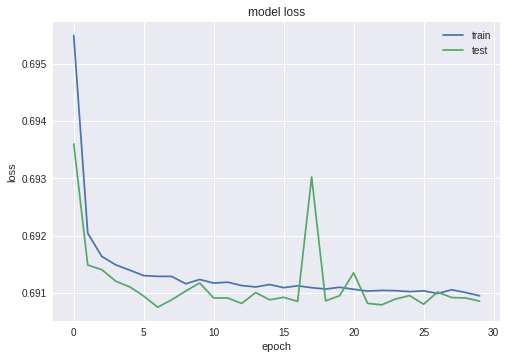

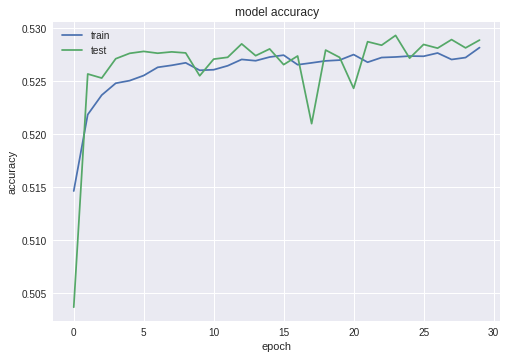

In [29]:
# PLOT
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# LSTM approach

In [0]:
def build_lstm_model(tensor_shape, batch_size=128, hidden_neurons=100):
  model = tf.keras.Sequential()
  model.add(layers.LSTM(hidden_neurons, 
                        batch_input_shape=(batch_size, tensor_shape[0], tensor_shape[1]), 
                        return_sequences=True))
  
  model.add(layers.LSTM(hidden_neurons, return_sequences=True))
  model.add(layers.LSTM(hidden_neurons))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(32,activation='relu'))
  model.add(layers.Dense(2, activation='softmax'))
  return model
  

In [0]:
BATCH_SIZE=512

In [0]:
print(X_train.shape)
model_2 = build_lstm_model(tensor_shape=(X_train.shape[1], X_train.shape[2]), batch_size=BATCH_SIZE)

(1780950, 30, 4)


In [0]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (512, 30, 10)             600       
_________________________________________________________________
lstm_10 (LSTM)               (512, 30, 10)             840       
_________________________________________________________________
lstm_11 (LSTM)               (512, 10)                 840       
_________________________________________________________________
flatten_3 (Flatten)          (512, 10)                 0         
_________________________________________________________________
dense_9 (Dense)              (512, 64)                 704       
_________________________________________________________________
batch_normalization_v1_3 (Ba (512, 64)                 256       
_________________________________________________________________
dense_10 (Dense)             (512, 32)                 2080      
__________

In [0]:
#OPTIMIZER
opt = tf.keras.optimizers.Adam(lr=0.002)

#tf.train.AdamOptimizer(learning_rate=0.002)

# CALLBACKS
fp = save_folder+"fx_multivariate_model_lstm.hdf5"
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=30, min_lr=0.000001, verbose=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=fp, verbose=1, save_best_only=True)

#COMPILE
model_2.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
# TRAIN
# epochs= 100 normally
# batch_size = 128
history = model_2.fit(
            X_train, 
            Y_train, 
            epochs = 1,
            batch_size = 512, 
            verbose=1, 
            validation_data=(X_val, Y_val),
            callbacks=[reduce_lr, checkpointer],
            shuffle=True)